In [1]:
# Basic data and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
df = pd.read_csv("breast-cancer.csv")

# Drop the 'id' column and map 'diagnosis' to binary: M = 1, B = 0
df = df.drop(columns=["id"])
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [3]:
# Separate input features (X) and the target variable (y)
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [4]:
# Count how many zeros appear in each feature column
(X == 0).sum().sort_values(ascending=False)

concave points_mean        13
concavity_mean             13
concave points_worst       13
concavity_worst            13
concavity_se               13
concave points_se          13
compactness_mean            0
smoothness_mean             0
symmetry_mean               0
fractal_dimension_mean      0
perimeter_mean              0
area_mean                   0
radius_mean                 0
texture_mean                0
area_se                     0
perimeter_se                0
texture_se                  0
radius_se                   0
symmetry_se                 0
fractal_dimension_se        0
compactness_se              0
smoothness_se               0
texture_worst               0
radius_worst                0
perimeter_worst             0
area_worst                  0
compactness_worst           0
smoothness_worst            0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

# Replace 0s with NaN so the imputer knows they're missing
X_replaced = X.replace(0, np.nan)

# Impute missing values using the mean
imputer_mean = SimpleImputer(strategy="mean")
X_mean_imputed = pd.DataFrame(imputer_mean.fit_transform(X_replaced), columns=X.columns)
X_mean_imputed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Impute missing values using the median
imputer_median = SimpleImputer(strategy="median")
X_median_imputed = pd.DataFrame(imputer_median.fit_transform(X_replaced), columns=X.columns)
X_median_imputed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.model_selection import train_test_split

# Split the mean-imputed version
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(
    X_mean_imputed, y, test_size=0.3, random_state=42
)

# Split the median-imputed version
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(
    X_median_imputed, y, test_size=0.3, random_state=42
)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to train and evaluate a model
def evaluate_model(X_train, X_test, y_train, y_test, label=""):
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"--- {label} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print()

evaluate_model(X_train_mean, X_test_mean, y_train_mean, y_test_mean, label="Mean Imputation (max_depth=5)")
evaluate_model(X_train_median, X_test_median, y_train_median, y_test_median, label="Median Imputation (max_depth=5)")

--- Mean Imputation (max_depth=5) ---
Accuracy : 0.9532163742690059
Precision: 0.9365079365079365
Recall   : 0.9365079365079365
F1 Score : 0.9365079365079365

--- Median Imputation (max_depth=5) ---
Accuracy : 0.9532163742690059
Precision: 0.9365079365079365
Recall   : 0.9365079365079365
F1 Score : 0.9365079365079365



In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Function to evaluate KNN with a given k
def evaluate_knn(X_train, X_test, y_train, y_test, k, label=""):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"--- {label} (k={k}) ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print()

In [30]:
# Try k = 3, 9, 15, 21 on both mean and median imputed datasets
for k in [3, 9, 15, 21]:
    evaluate_knn(X_train_mean, X_test_mean, y_train_mean, y_test_mean, k, label="Mean Imputation")
    evaluate_knn(X_train_median, X_test_median, y_train_median, y_test_median, k, label="Median Imputation")

--- Mean Imputation (k=3) ---
Accuracy : 0.9415204678362573
Precision: 0.9344262295081968
Recall   : 0.9047619047619048
F1 Score : 0.9193548387096774

--- Median Imputation (k=3) ---
Accuracy : 0.9415204678362573
Precision: 0.9344262295081968
Recall   : 0.9047619047619048
F1 Score : 0.9193548387096774

--- Mean Imputation (k=9) ---
Accuracy : 0.9707602339181286
Precision: 0.9833333333333333
Recall   : 0.9365079365079365
F1 Score : 0.959349593495935

--- Median Imputation (k=9) ---
Accuracy : 0.9707602339181286
Precision: 0.9833333333333333
Recall   : 0.9365079365079365
F1 Score : 0.959349593495935

--- Mean Imputation (k=15) ---
Accuracy : 0.9649122807017544
Precision: 0.9830508474576272
Recall   : 0.9206349206349206
F1 Score : 0.9508196721311475

--- Median Imputation (k=15) ---
Accuracy : 0.9649122807017544
Precision: 0.9830508474576272
Recall   : 0.9206349206349206
F1 Score : 0.9508196721311475

--- Mean Imputation (k=21) ---
Accuracy : 0.9532163742690059
Precision: 0.98245614035087

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Function to evaluate Random Forest
def evaluate_random_forest(X_train, X_test, y_train, y_test, label=""):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"--- {label} (Random Forest) ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print()

In [12]:
evaluate_random_forest(X_train_mean, X_test_mean, y_train_mean, y_test_mean, label="Mean Imputation")
evaluate_random_forest(X_train_median, X_test_median, y_train_median, y_test_median, label="Median Imputation")

--- Mean Imputation (Random Forest) ---
Accuracy : 0.9707602339181286
Precision: 0.9833333333333333
Recall   : 0.9365079365079365
F1 Score : 0.959349593495935

--- Median Imputation (Random Forest) ---
Accuracy : 0.9707602339181286
Precision: 0.9833333333333333
Recall   : 0.9365079365079365
F1 Score : 0.959349593495935



In [13]:
from sklearn.ensemble import AdaBoostClassifier

# Function to evaluate AdaBoost
def evaluate_adaboost(X_train, X_test, y_train, y_test, label=""):
    clf = AdaBoostClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"--- {label} (AdaBoost) ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print()

In [14]:
evaluate_adaboost(X_train_mean, X_test_mean, y_train_mean, y_test_mean, label="Mean Imputation")
evaluate_adaboost(X_train_median, X_test_median, y_train_median, y_test_median, label="Median Imputation")

--- Mean Imputation (AdaBoost) ---
Accuracy : 0.9766081871345029
Precision: 0.9682539682539683
Recall   : 0.9682539682539683
F1 Score : 0.9682539682539683

--- Median Imputation (AdaBoost) ---
Accuracy : 0.9707602339181286
Precision: 0.953125
Recall   : 0.9682539682539683
F1 Score : 0.9606299212598425



In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply StandardScaler
scaler_standard = StandardScaler()
X_mean_standard = pd.DataFrame(scaler_standard.fit_transform(X_mean_imputed), columns=X.columns)

# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
X_mean_minmax = pd.DataFrame(scaler_minmax.fit_transform(X_mean_imputed), columns=X.columns)

In [16]:
# Split scaled data
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_mean_standard, y, test_size=0.3, random_state=42)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_mean_minmax, y, test_size=0.3, random_state=42)

# Try KNN on both
for k in [3, 9, 15]:
    evaluate_knn(X_train_std, X_test_std, y_train_std, y_test_std, k, label="StandardScaler")
    evaluate_knn(X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax, k, label="MinMaxScaler")

--- StandardScaler (k=3) ---
Accuracy : 0.9590643274853801
Precision: 0.9516129032258065
Recall   : 0.9365079365079365
F1 Score : 0.944

--- MinMaxScaler (k=3) ---
Accuracy : 0.9707602339181286
Precision: 0.967741935483871
Recall   : 0.9523809523809523
F1 Score : 0.96

--- StandardScaler (k=9) ---
Accuracy : 0.9707602339181286
Precision: 0.967741935483871
Recall   : 0.9523809523809523
F1 Score : 0.96

--- MinMaxScaler (k=9) ---
Accuracy : 0.9649122807017544
Precision: 0.9672131147540983
Recall   : 0.9365079365079365
F1 Score : 0.9516129032258065

--- StandardScaler (k=15) ---
Accuracy : 0.9532163742690059
Precision: 0.9661016949152542
Recall   : 0.9047619047619048
F1 Score : 0.9344262295081968

--- MinMaxScaler (k=15) ---
Accuracy : 0.9590643274853801
Precision: 0.9666666666666667
Recall   : 0.9206349206349206
F1 Score : 0.943089430894309



In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Use the same dataset (with imputation already done)
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate
print("--- StandardScaler ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Repeat for MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("\n--- MinMaxScaler ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

--- StandardScaler ---
Accuracy : 0.9532163742690059
Precision: 0.9365079365079365
Recall   : 0.9365079365079365
F1 Score : 0.9365079365079365

--- MinMaxScaler ---
Accuracy : 0.9532163742690059
Precision: 0.9365079365079365
Recall   : 0.9365079365079365
F1 Score : 0.9365079365079365


In [18]:
# Add the target column back to compute correlations
df_with_target = X.copy()
df_with_target["diagnosis"] = y

# Compute correlations
correlations = df_with_target.corr()["diagnosis"].drop("diagnosis").sort_values(key=abs, ascending=False)

# Show top 5 features most correlated with the target
print("Top 5 most correlated features:")
print(correlations.head(5))

Top 5 most correlated features:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
Name: diagnosis, dtype: float64


In [19]:
# Select only the top 5 features
top_5_features = [
    "concave points_worst",
    "perimeter_worst",
    "concave points_mean",
    "radius_worst",
    "perimeter_mean"
]

# Create a new dataset using only the top 5 features
X_top5 = X[top_5_features]

In [20]:
# Train/test split
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_top5, y, test_size=0.3, random_state=42)

# Run KNN with different k values
for k in [3, 9, 15]:
    evaluate_knn(X_train_top5, X_test_top5, y_train_top5, y_test_top5, k, label="Top 5 Features")

--- Top 5 Features (k=3) ---
Accuracy : 0.9473684210526315
Precision: 0.9655172413793104
Recall   : 0.8888888888888888
F1 Score : 0.9256198347107438

--- Top 5 Features (k=9) ---
Accuracy : 0.9532163742690059
Precision: 0.9661016949152542
Recall   : 0.9047619047619048
F1 Score : 0.9344262295081968

--- Top 5 Features (k=15) ---
Accuracy : 0.9532163742690059
Precision: 0.9661016949152542
Recall   : 0.9047619047619048
F1 Score : 0.9344262295081968



In [21]:
# Reuse train/test split for top 5 features
# (if not already created)
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(
    X_top5, y, test_size=0.3, random_state=42
)

# Evaluate using Random Forest
evaluate_random_forest(X_train_top5, X_test_top5, y_train_top5, y_test_top5, label="Top 5 Features")

--- Top 5 Features (Random Forest) ---
Accuracy : 0.9532163742690059
Precision: 0.9508196721311475
Recall   : 0.9206349206349206
F1 Score : 0.9354838709677419



In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("breast-cancer.csv")

# Separate features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Combine to calculate correlation with target
df_with_target = X.copy()
df_with_target["diagnosis"] = y

# Convert target to numeric
y_numeric = y.map({'M': 1, 'B': 0})

# Add numeric target for correlation
df_with_target = X.copy()
df_with_target["diagnosis"] = y_numeric

# Compute Pearson correlation
correlations = df_with_target.corr()["diagnosis"].drop("diagnosis").sort_values(key=abs, ascending=False)

# Show correlation matrix (table)
print("📊 Pearson Correlation with Target (diagnosis):")
print(correlations)


# Select features with absolute correlation > 0.6
selected_features = correlations[correlations.abs() > 0.6].index.tolist()
print(f"\n✅ Features selected (correlation > 0.6): {selected_features}")
print

📊 Pearson Correlation with Target (diagnosis):
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se    

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train-test split for both full and reduced feature sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)
X_selected = X[selected_features]
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected, y_numeric, test_size=0.3, random_state=42)

# Train Decision Tree on full feature set
clf_full = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_full.fit(X_train_full, y_train)
y_pred_full = clf_full.predict(X_test_full)

# Train Decision Tree on selected (correlated) feature set
clf_sel = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_sel.fit(X_train_sel, y_train)
y_pred_sel = clf_sel.predict(X_test_sel)

# Evaluation function
def evaluate(label, y_true, y_pred):
    print(f"\n--- {label} ---")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1 Score :", round(f1_score(y_true, y_pred), 4))

# Show results
evaluate("Full Feature Set", y_test, y_pred_full)
evaluate("Selected Feature Set (correlation > 0.6)", y_test, y_pred_sel)


--- Full Feature Set ---
Accuracy : 0.9591
Precision: 0.9375
Recall   : 0.9524
F1 Score : 0.9449

--- Selected Feature Set (correlation > 0.6) ---
Accuracy : 0.9357
Precision: 0.9194
Recall   : 0.9048
F1 Score : 0.912


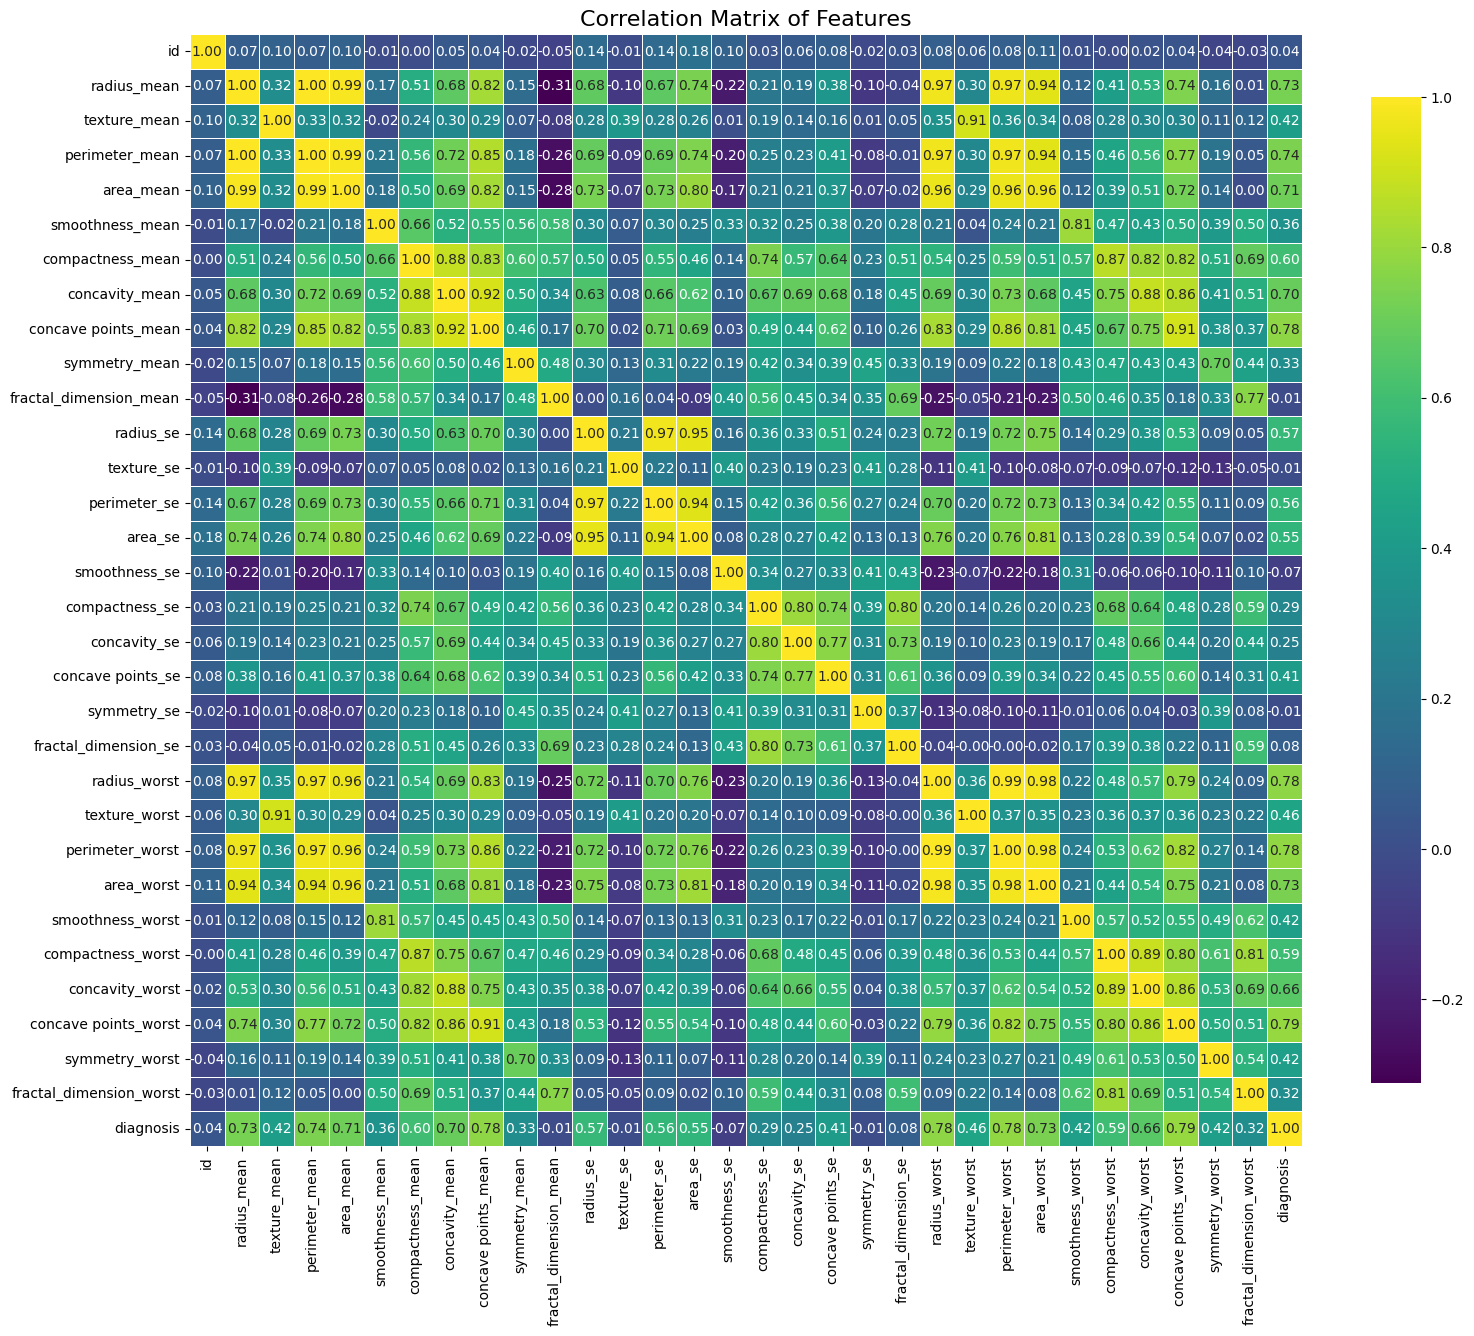

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'diagnosis' is numeric
df_corr = X.copy()
df_corr["diagnosis"] = y_numeric

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

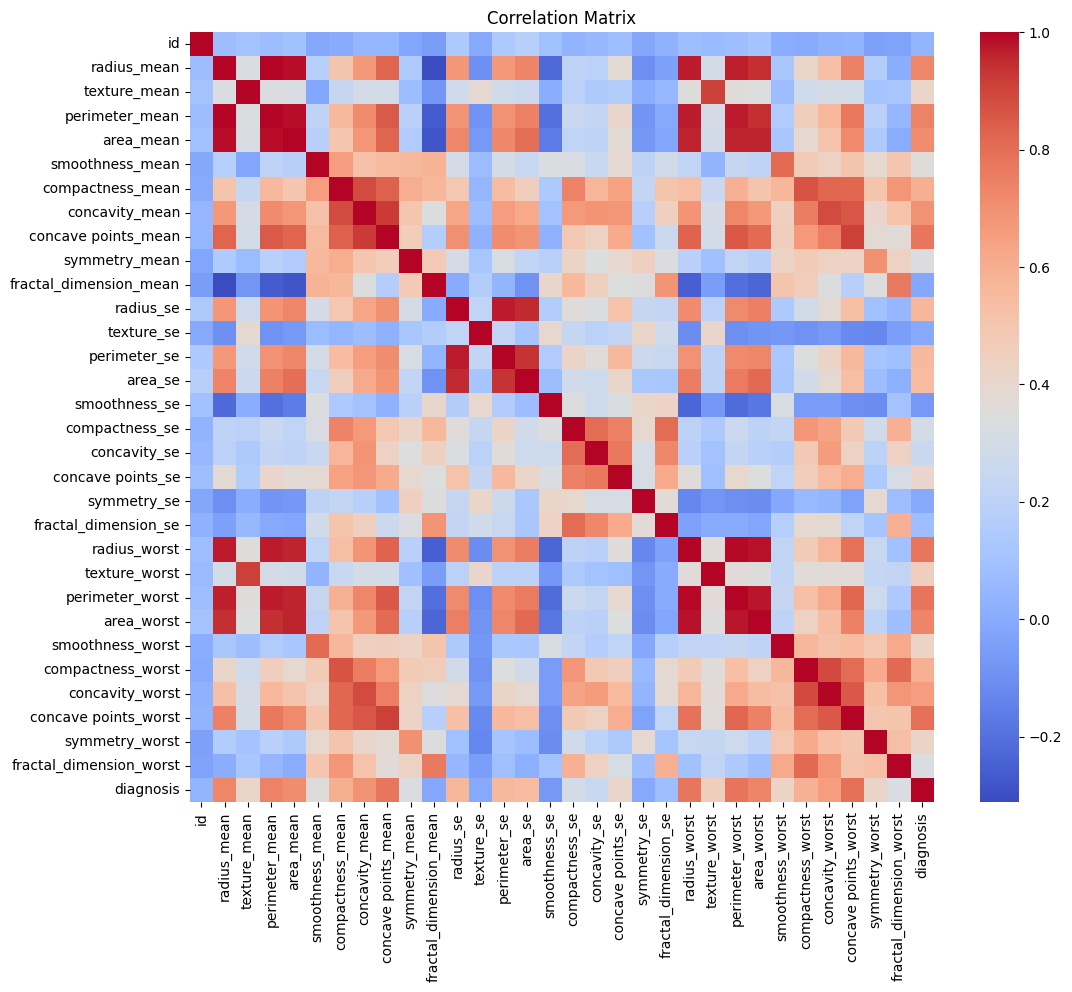

In [25]:
# Full correlation matrix
correlation_matrix = df_with_target.corr()

# Display as a DataFrame (or heatmap if desired)
print(correlation_matrix)

# Or, if you're using Jupyter and want it to look cleaner:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Step 1: Normalize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your original feature matrix

# Step 2: Apply PCA
pca = PCA(n_components=10)  # You can tune this later
X_pca = pca.fit_transform(X_scaled)

# Step 3: Train-test split (same split for fair comparison)
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y_numeric, test_size=0.3, random_state=42)

# Step 4: Train and evaluate Decision Tree on both versions

def evaluate_model(X_train, X_test, y_train, y_test, depth, label):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n--- {label} (max_depth={depth}) ---")
    print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall   :", round(recall_score(y_test, y_pred), 4))
    print("F1 Score :", round(f1_score(y_test, y_pred), 4))

for depth in [2, 8]:
    evaluate_model(X_train_orig, X_test_orig, y_train, y_test, depth, label="Without PCA")
    evaluate_model(X_train_pca, X_test_pca, y_train, y_test, depth, label="With PCA")


--- Without PCA (max_depth=2) ---
Accuracy : 0.9298
Precision: 0.9048
Recall   : 0.9048
F1 Score : 0.9048

--- With PCA (max_depth=2) ---
Accuracy : 0.9474
Precision: 0.95
Recall   : 0.9048
F1 Score : 0.9268

--- Without PCA (max_depth=8) ---
Accuracy : 0.9357
Precision: 0.8824
Recall   : 0.9524
F1 Score : 0.916

--- With PCA (max_depth=8) ---
Accuracy : 0.9591
Precision: 0.9118
Recall   : 0.9841
F1 Score : 0.9466


In [28]:
from sklearn.tree import DecisionTreeClassifier

def evaluate_tree_with_depth(X_train, X_test, y_train, y_test, max_depth, label=""):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"--- {label} | max_depth={max_depth} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Scale the features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Storage
results = []

# ---- KNN ----
for k in [3, 9, 15, 21]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(["KNN", "n_neighbors", k,
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    f1_score(y_test, y_pred)])

# ---- Decision Tree (no scaling needed) ----
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in [2, 8, 14]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_dt, y_train_dt)
    y_pred = model.predict(X_test_dt)
    results.append(["Decision Tree", "max_depth", depth,
                    accuracy_score(y_test_dt, y_pred),
                    precision_score(y_test_dt, y_pred),
                    recall_score(y_test_dt, y_pred),
                    f1_score(y_test_dt, y_pred)])

# ---- AdaBoost ----
for n in [10, 20, 30]:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(["AdaBoost", "n_estimators", n,
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    f1_score(y_test, y_pred)])

# ---- Random Forest ----
for n in [10, 30, 50, 60]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(["Random Forest", "n_estimators", n,
                    accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                    f1_score(y_test, y_pred)])

# Convert to DataFrame for easy viewing
import pandas as pd
results_df = pd.DataFrame(results, columns=["Classifier", "Hyperparameter", "Value",
                                             "Accuracy", "Precision", "Recall", "F1 Score"])
results_df.sort_values(by=["Classifier", "Value"]).reset_index(drop=True, inplace=True)
results_df